In [ ]:
i# import libraries
import pandas as pd
import numpy as np
from scipy import stats

# Untuk kebutuhan visual
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Untuk feature engineering
from sklearn.model_selection import train_test_split

In [ ]:
# Load data
data = pd.read_excel('Online_Retail.xlsx')

# Menampilkan data


In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# cek missing value
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# cek data duplicate
data.duplicated().sum()

5268

In [ ]:
# Dictionary untuk menyimpan hasil
columns_with_duplicates = {}

# Iterasi melalui setiap kolom untuk mengecek duplikat
for column in data.columns:
    if data[column].duplicated().any():  # Cek jika ada duplikat di kolom tersebut
        columns_with_duplicates[column] = True
    else:
        columns_with_duplicates[column] = False

# Menampilkan kolom yang memiliki data duplikat
for column, has_duplicates in columns_with_duplicates.items():
    if has_duplicates:
        print(f"Kolom '{column}' memiliki data duplikat.")
    else:
        print(f"Kolom '{column}' tidak memiliki data duplikat.")

Kolom 'InvoiceNo' memiliki data duplikat.
Kolom 'StockCode' memiliki data duplikat.
Kolom 'Description' memiliki data duplikat.
Kolom 'Quantity' memiliki data duplikat.
Kolom 'InvoiceDate' memiliki data duplikat.
Kolom 'UnitPrice' memiliki data duplikat.
Kolom 'CustomerID' memiliki data duplikat.
Kolom 'Country' memiliki data duplikat.


In [ ]:
data = data.dropna()

In [ ]:
data.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# Menambahkan kolom baru
data['TotalPrice'] = data['UnitPrice']*data['Quantity']
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


Negara Manakah yang memiliki Transaksi terbanyak?

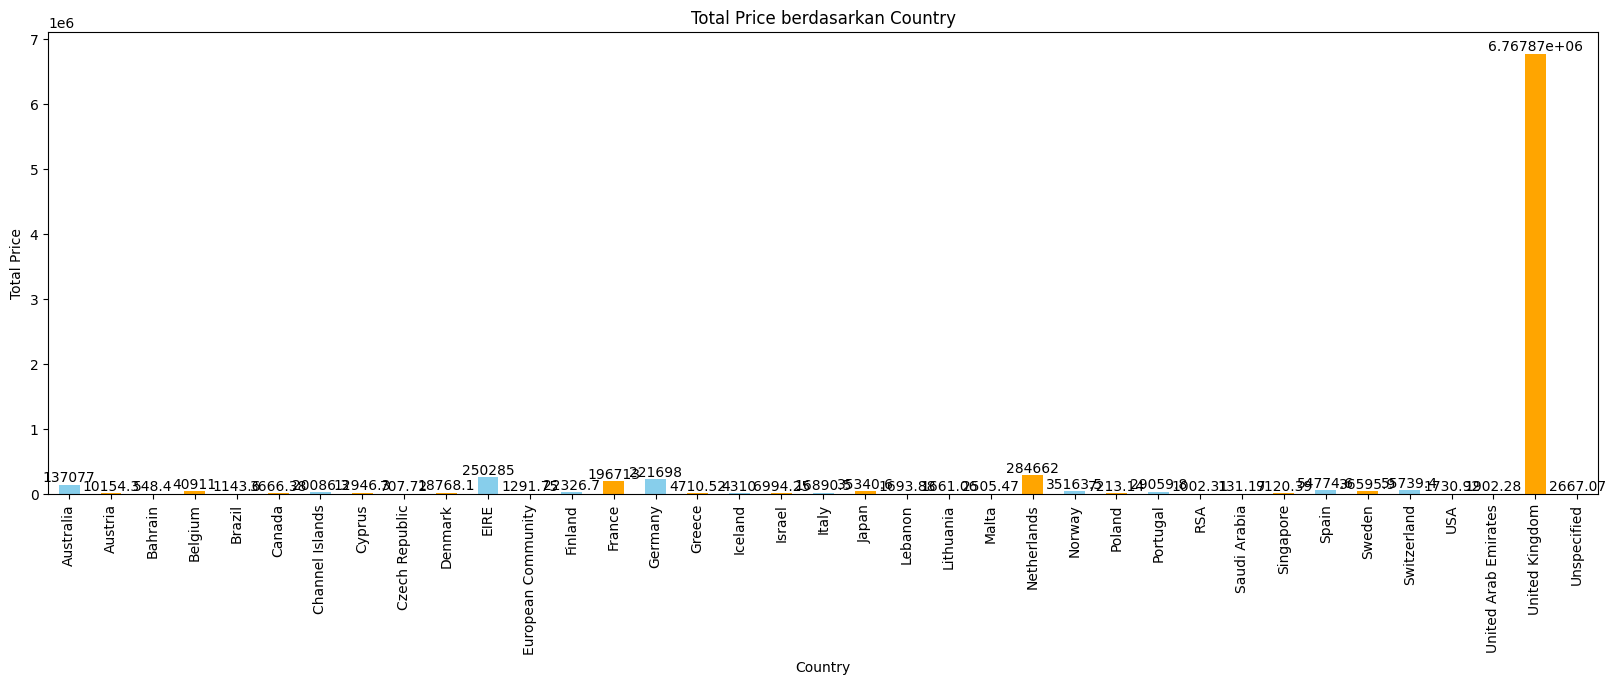

In [ ]:
fig,ax1 = plt.subplots(figsize=(20,6))
Country= data.groupby('Country')['TotalPrice'].sum().plot(kind='bar', color=['skyblue', 'orange'], ax=ax1)

plt.xlabel('Country')
plt.ylabel('Total Price')
plt.title('Total Price berdasarkan Country')
Country.bar_label(Country.containers[0])

#memperlihatkan plot
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import datetime as dt
NOW = dt.datetime(2024,2,2)

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

- The Study was conducted 1 Jan 2012
- The Earliest transaction 01 Dec 2010
- The Latest transaction 09 Dec 2011

In [ ]:
print(data['InvoiceDate'].min(), data['InvoiceDate'].max())

2010-12-01 08:26:00 2011-12-09 12:50:00


In [ ]:
sd = dt.datetime(2012,1,1)
data['hist']=sd - data['InvoiceDate']
data['hist'].astype('timedelta64[D]')
data['hist']=data['hist'] / np.timedelta64(1, 'D')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,hist
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,395.648611
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,395.648611
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,395.648611
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,395.648611
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,395.648611


In [ ]:
rfmTable = data.groupby('CustomerID').agg({'hist': lambda x:x.min(), # Recency
                                        'CustomerID': lambda x: len(x), # Frequency
                                        'TotalPrice': lambda x: x.sum()}) # Monetary Value

rfmTable.rename(columns={'hist': 'recency',
                         'CustomerID': 'frequency',
                         'TotalPrice': 'monetary_value'}, inplace=True)

In [ ]:
rfmTable.head()

,recency,frequency,monetary_value
CustomerID,,,
12346.0,347.571528,2,0.00
12347.0,24.338889,182,4310.00
12348.0,97.449306,31,1797.24
12349.0,40.589583,73,1757.55
12350.0,332.332639,17,334.40


In [ ]:
data[data['CustomerID'] == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,hist
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,347.582639
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6,347.571528


RFM analysis involves categorising R,F and M into 3 or more categories. For convenience, let's create 4 categories based on quartiles (quartiles roughly divide the sample into 4 segments equal proportion)

In [ ]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

         recency  frequency  monetary_value
0.25   38.604514       17.0        293.3625
0.50   72.335764       42.0        648.0750
0.75  165.360069      102.0       1611.7250 <class 'pandas.core.frame.DataFrame'>


In [ ]:
quartiles=quartiles.to_dict()
quartiles

{'recency': {0.25: 38.60451388888889,
  0.5: 72.33576388888889,
  0.75: 165.36006944444443},
 'frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 102.0},
 'monetary_value': {0.25: 293.3625, 0.5: 648.0750000000002, 0.75: 1611.725}}

In [ ]:
## for Recency

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

## for Frequency and Monetary value

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1


In [ ]:
rfmSeg = rfmTable
rfmSeg['R_Quartile'] = rfmSeg['recency'].apply(RClass, args=('recency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FMClass, args=('frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['monetary_value'].apply(FMClass, args=('monetary_value',quartiles,))

In [ ]:
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

In [ ]:
rfmSeg.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
12346.0,347.571528,2,0.00,4,4,4,444
12347.0,24.338889,182,4310.00,1,1,1,111
12348.0,97.449306,31,1797.24,3,3,1,331
12349.0,40.589583,73,1757.55,2,2,1,221
12350.0,332.332639,17,334.40,4,4,3,443


In [ ]:
rfmSeg.sort_values(by=['RFMClass', 'monetary_value'], ascending=[True, False])

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
14646.0,23.491667,2085,279489.02,1,1,1,111
18102.0,22.506944,433,256438.49,1,1,1,111
17450.0,30.438194,351,187482.17,1,1,1,111
14911.0,23.337500,5903,132572.62,1,1,1,111
14156.0,31.545833,1420,113384.14,1,1,1,111
...,...,...,...,...,...,...,...
15823.0,359.459722,17,-840.76,4,4,4,444
12503.0,359.506250,1,-1126.00,4,4,4,444
14213.0,393.592361,5,-1192.20,4,4,4,444


In [ ]:
rfmSeg.groupby('RFMClass').agg('monetary_value').mean()

RFMClass
111    8889.774345
112    1120.248889
113     473.795000
114     272.440000
121    4083.185325
          ...     
434     189.539065
441    4965.710000
442     951.433333
443     388.852427
444     108.348962
Name: monetary_value, Length: 62, dtype: float64

In [ ]:
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']
print(rfmSeg.head(), rfmSeg.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency         4372 non-null   float64
 1   frequency       4372 non-null   int64  
 2   monetary_value  4372 non-null   float64
 3   R_Quartile      4372 non-null   int64  
 4   F_Quartile      4372 non-null   int64  
 5   M_Quartile      4372 non-null   int64  
 6   RFMClass        4372 non-null   object 
 7   Total Score     4372 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 307.4+ KB
               recency  frequency  monetary_value  R_Quartile  F_Quartile  \
CustomerID                                                                  
12346.0     347.571528          2            0.00           4           4   
12347.0      24.338889        182         4310.00           1           1   
12348.0      97.449306         31         1797.24           3

In [ ]:
print("Best Customers: ",len(rfmSeg[rfmSeg['RFMClass']=='444']))
print('Loyal Customers: ',len(rfmSeg[rfmSeg['F_Quartile']==4]))
print("Big Spenders: ",len(rfmSeg[rfmSeg['M_Quartile']==4]))
print('Almost Lost: ', len(rfmSeg[rfmSeg['RFMClass']=='244']))
print('Lost Customers: ',len(rfmSeg[rfmSeg['RFMClass']=='144']))
print('Lost Cheap Customers: ',len(rfmSeg[rfmSeg['RFMClass']=='111']))

Best Customers:  395
Loyal Customers:  1110
Big Spenders:  1093
Almost Lost:  125
Lost Customers:  64
Lost Cheap Customers:  458


In [ ]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean()

Total Score
3     8889.774345
4     3996.409549
5     1901.991284
6     1376.709835
7      975.131816
8      727.571059
9      496.934174
10     346.316185
11     227.827168
12     108.348962
Name: monetary_value, dtype: float64

<Axes: xlabel='Total Score'>

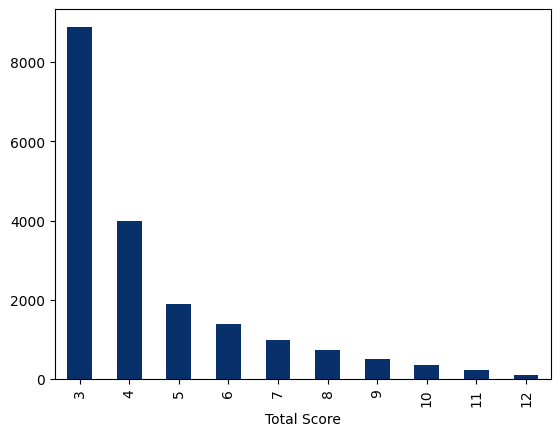

In [ ]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean().plot(kind='bar', colormap='Blues_r')


<Axes: xlabel='Total Score'>

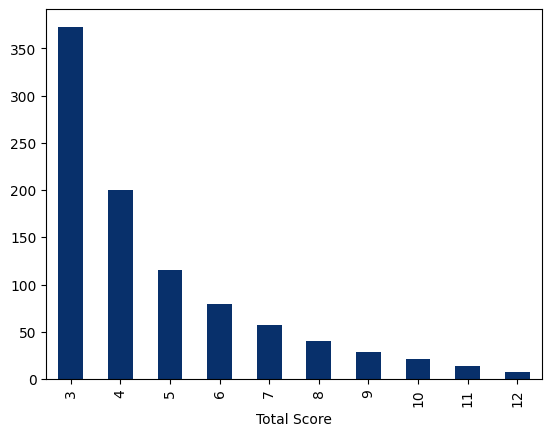

In [ ]:
rfmSeg.groupby('Total Score').agg('frequency').mean().plot(kind='bar', colormap='Blues_r')

<Axes: xlabel='Total Score'>

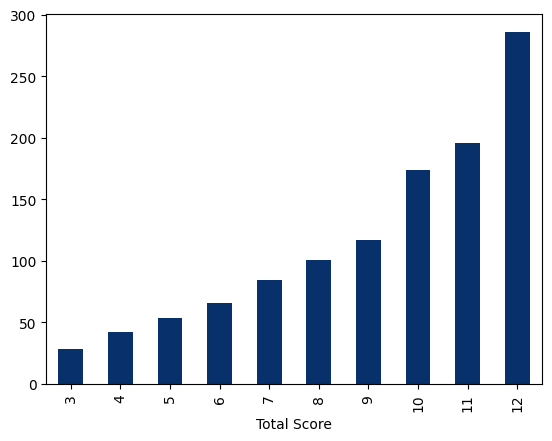

In [ ]:
rfmSeg.groupby('Total Score').agg('recency').mean().plot(kind='bar', colormap='Blues_r')